<a href="https://www.kaggle.com/code/ayauankale/notebook0c2fadd1c4?scriptVersionId=203166247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

                                            filepath            label
0  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
1  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
2  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
3  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
4  /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat


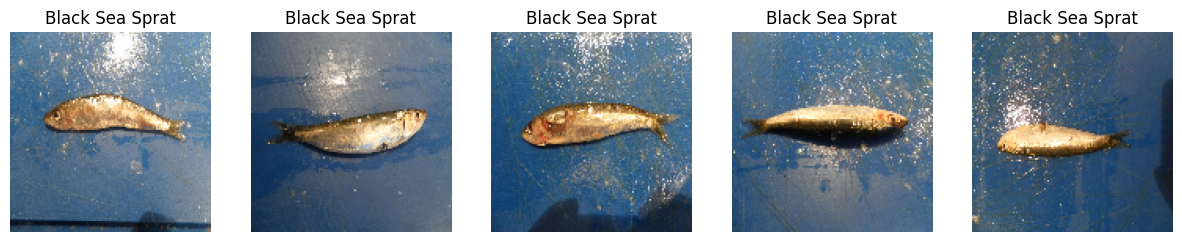

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.1292 - loss: 10.3574 - val_accuracy: 0.0698 - val_loss: 2.2305
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1319 - loss: 2.2790 - val_accuracy: 0.1860 - val_loss: 2.1497
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.1033 - loss: 2.1942 - val_accuracy: 0.1744 - val_loss: 2.1372
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1282 - loss: 2.1316 - val_accuracy: 0.1860 - val_loss: 2.1178
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1727 - loss: 2.0946 - val_accuracy: 0.1977 - val_loss: 2.1139
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1652 - loss: 2.1637 - val_accuracy: 0.1279 - val_loss: 2.1134
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.1358 - loss: 2.1273 - val_accuracy: 0.1860 - val_loss: 2.0812
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1529 - loss: 2.1194 - val_accuracy: 0.1395 - 

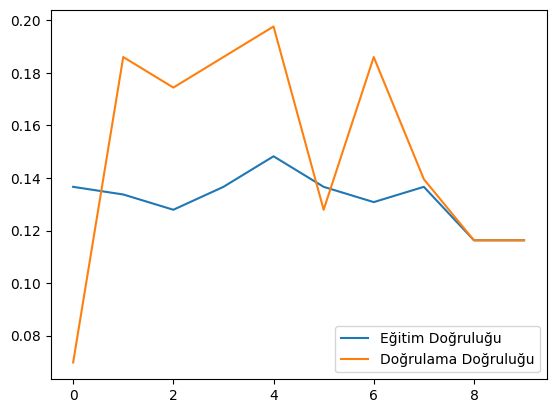

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        10
           1       1.00      0.00      0.00        10
           2       1.00      0.00      0.00        10
           3       1.00      0.00      0.00        10
           4       1.00      0.00      0.00        10
           5       1.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       1.00      0.00      0.00        10
           8       1.00      0.00      0.00         6

    accuracy                           0.12        86
   macro avg       0.79      0.11      0.02        86
weighted avg       0.78      0.12      0.02        86

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  1  0  0]
 [10  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [10  

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Veri klasör yolunu belirleyin
data_dir = "/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset"  # Kaggle üzerinde dataset yolu.

# 1. Resim dosyalarını ve etiketleri listeleme
filepaths = []
labels = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            filepaths.append(os.path.join(folder_path, img_file))
            labels.append(folder)  # Klasör adı etiketi temsil eder

## Resim yolları ve etiketlerden oluşan bir DataFrame oluşturarak verimizi organize ediyoruz.
data = pd.DataFrame({"filepath": filepaths, "label": labels})
print(data.head())

#  Veriyi daha iyi anlamak için ilk birkaç görseli çizdiriyoruz.
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    img = load_img(data["filepath"][i], target_size=(128, 128))
    ax.imshow(img)
    ax.set_title(data["label"][i])
    ax.axis('off')
plt.show()

# Modelimizi eğitmek ve doğrulamak için veriyi %80 eğitim %20 test olarak ayırıyoruz.
train_data, test_data = train_test_split(
    data, test_size=0.2, stratify=data["label"], random_state=42
)

def preprocess_image(filepath):
    """Görüntüyü numpy array'e çevirip normalize eder."""
    img = load_img(filepath, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    return img_array

# Modelin eğitebileceği forma getirmek için veriyi işliyoruz.
X_train = np.array([preprocess_image(fp) for fp in train_data["filepath"]])
X_test = np.array([preprocess_image(fp) for fp in test_data["filepath"]])
y_train = pd.get_dummies(train_data["label"]).values
y_test = pd.get_dummies(test_data["label"]).values

# 4. Modelin tanımlanması
model = Sequential([
    Input(shape=(128, 128, 3)),  # İlk katmanda Input kullanımı
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(y_train[0]), activation='softmax')  # Çıkış katmanı
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Class weights hesaplama (Veri dengesizliği için)
class_weights = compute_class_weight(
    'balanced', classes=np.unique(train_data["label"]), y=train_data["label"]
)
class_weights_dict = dict(enumerate(class_weights))

# 6. Modelin eğitilmesi
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    validation_data=(X_test, y_test), 
    class_weight=class_weights_dict  # Class weights ile eğitim
)

# 7. Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

# 8. Model değerlendirme ve metrikler
#Test verisi üzerinde tahmin yapıp, performansı ölçüyoruz.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, zero_division=1))  # Uyarıyı giderir
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))
